In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Define class names
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [4]:
# Initialize dictionary to store 10 samples for each class
samples_per_class = {index: [] for index in range(10)}



# Collect 10 samples for each class
for index in range(len(train_images)):
    label = train_labels[index]

    if len(samples_per_class[label]) < 10:
        samples_per_class[label].append(train_images[index])




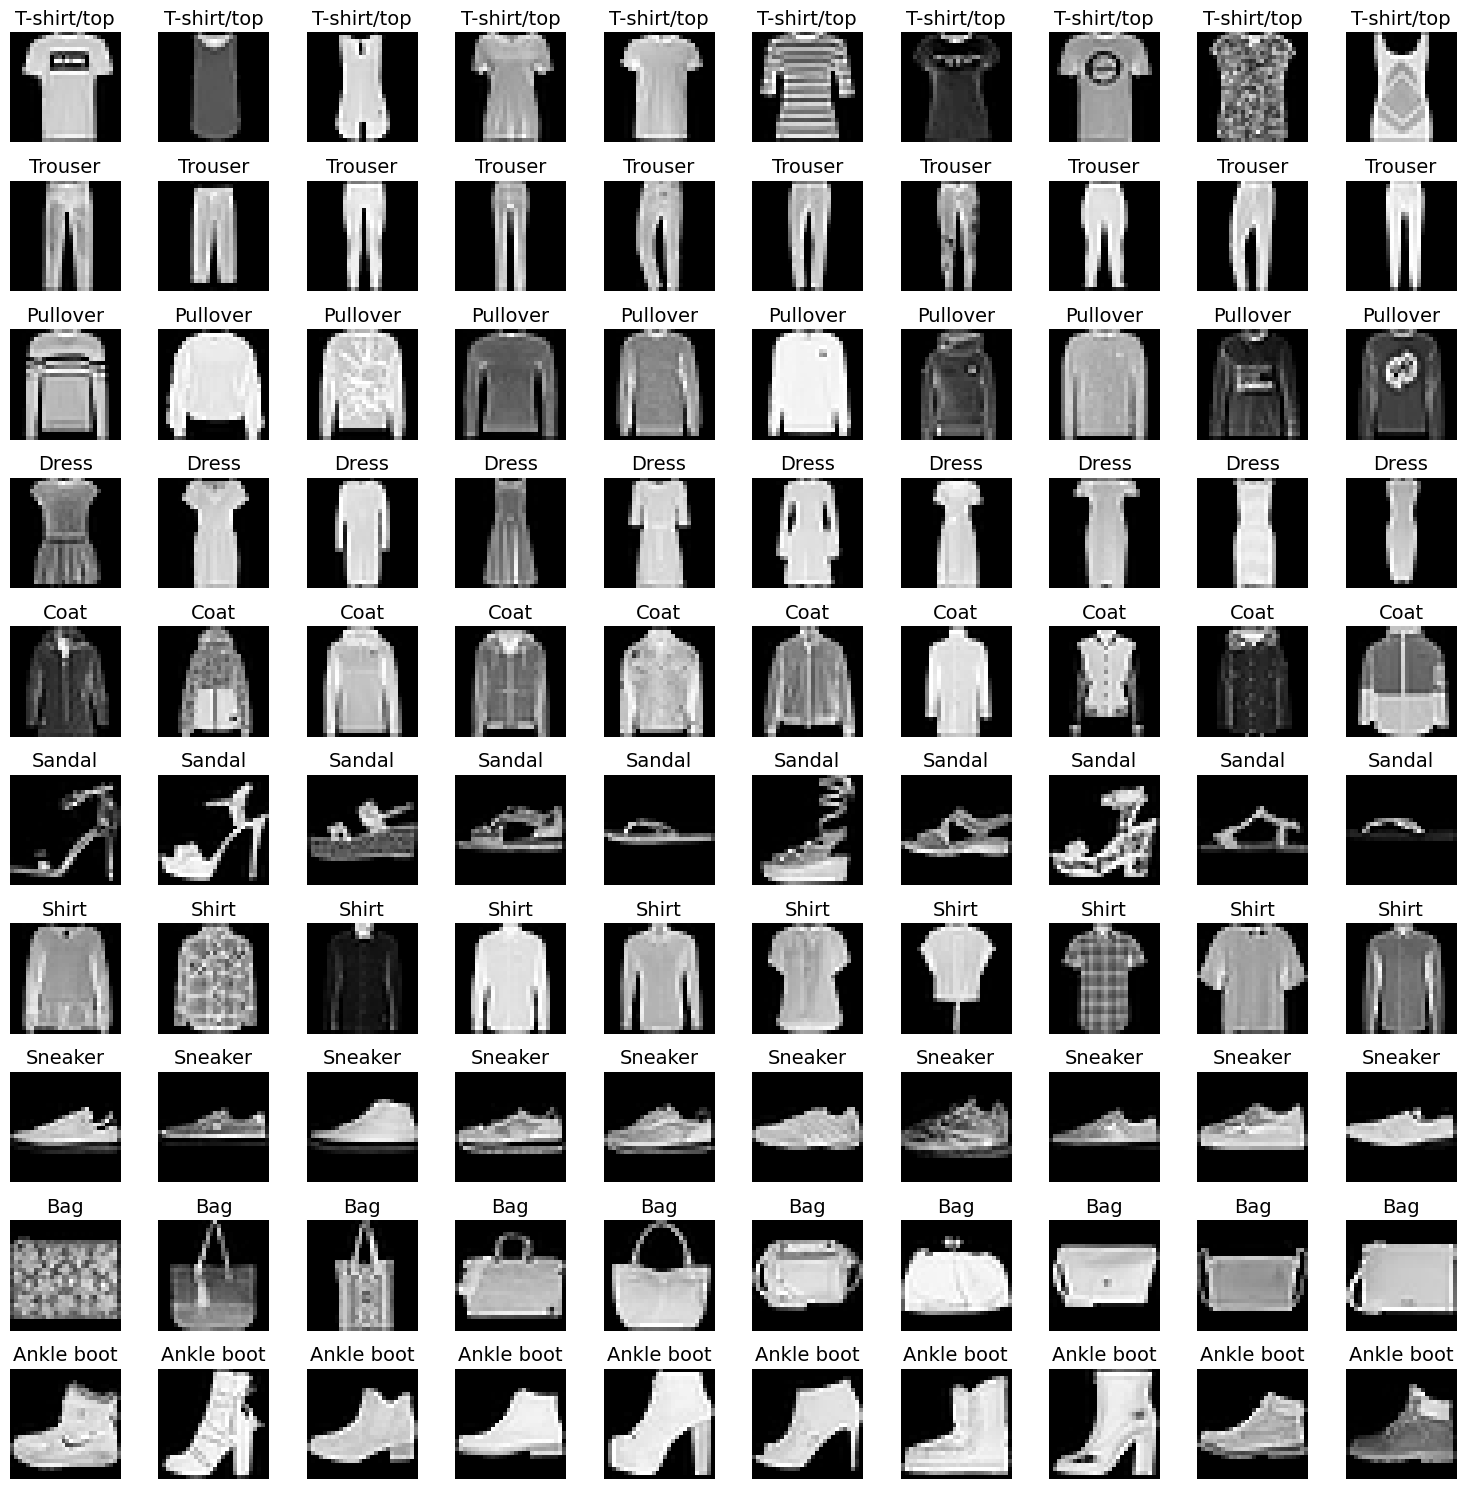

In [5]:
# Visualize samples
figure, axes = plt.subplots(10, 10, figsize=(15, 15))

for index in range(10):
    for j_index in range(10):
        axes[index, j_index].imshow(samples_per_class[index][j_index], cmap='gray')
        axes[index, j_index].set_title(class_names[index], fontsize=14)
        axes[index, j_index].axis('off')
        
plt.tight_layout()
plt.show()

In [6]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train model
history = model.fit(train_images, train_labels, epochs = 5, validation_data=(test_images, test_labels))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          31,370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,106 (516.04 KB)

 Trainable params: 132,106 (516.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8036 - loss: 0.5602 - val_accuracy: 0.8808 - val_loss: 0.3267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9042 - loss: 0.2713 - val_accuracy: 0.9024 - val_loss: 0.2706
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9186 - loss: 0.2262 - val_accuracy: 0.9041 - val_loss: 0.2601
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9308 - loss: 0.1908 - val_accuracy: 0.9096 - val_loss: 0.2504
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9438 - loss: 0.1576 - val_accuracy: 0.9124 - val_loss: 0.2439


In [7]:
# Generate random indices for test images
number_of_samples_to_visualize = 10
random_indices = np.random.choice(len(test_images), number_of_samples_to_visualize, replace=False)

# Predict on randomly selected test images
predicted_labels = model.predict(test_images[random_indices])
predicted_classes = np.argmax(predicted_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


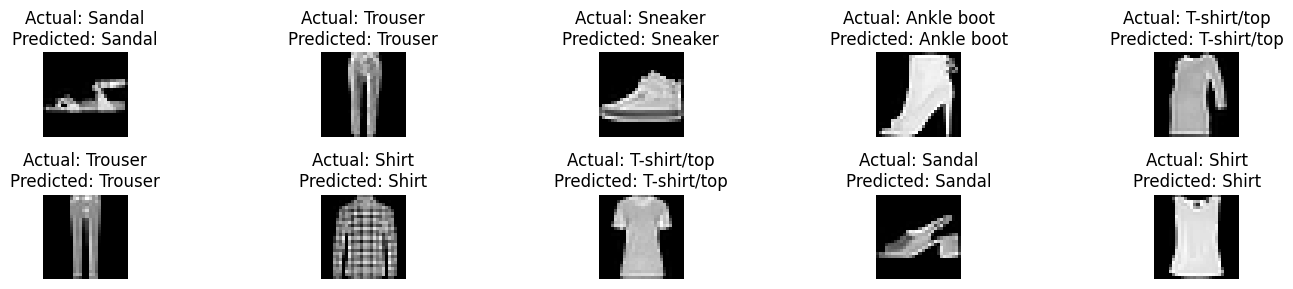

In [8]:
# Visualise model predictions
plt.figure(figsize=(15, 3))
for index, j_index in enumerate(random_indices):
    plt.subplot(2, 5, index + 1)
    plt.imshow(test_images[j_index], cmap='gray')
    plt.title(f'Actual: {class_names[test_labels[j_index]]}\nPredicted: {class_names[predicted_classes[index]]}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()